In [1]:
from NCHelper import NCHelper
from datetime import datetime, timedelta
import xarray as xr
import time
import os
import shutil

In [5]:
date_str = "2023110700"
dir_path = f"storage/{date_str}"
if os.path.exists(dir_path):
    shutil.rmtree(dir_path)
os.mkdir(dir_path)

nch = NCHelper(
    f"http://182.16.248.173:8080/dods/INA-NWP/{date_str}/{date_str}-d01-asim"
)

reading dataset...
reading dataset done


c:\Users\falbas\miniconda3\Lib\site-packages\xarray\coding\times.py:167: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


In [4]:
date = datetime.now().replace(hour=00)
nch = None
dir_path = ""
while True:
    date_str = date.strftime("%Y%m%d%H")
    dir_path = f"storage/{date_str}"
    if os.path.exists(dir_path):
        print("already exists")
        break

    os.mkdir(dir_path)
    try:
        nch = NCHelper(
            f"http://182.16.248.173:8080/dods/INA-NWP/{date_str}/{date_str}-d01-asim"
        )
        break
    except:
        print(date_str)
        date = date - timedelta(hours=12)
    time.sleep(1)

reading dataset...
reading dataset done


c:\Users\falbas\miniconda3\Lib\site-packages\xarray\coding\times.py:167: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


In [5]:
u = nch.ds["u"]
v = nch.ds["v"]
lat = nch.ds["lat"]
lon = nch.ds["lon"]
nch.nc2asc(u[0][0], lat, lon, f"{dir_path}/U")
nch.nc2asc(v[0][0], lat, lon, f"{dir_path}/V")

generating storage/2023110800/U ascii grid...
output: d:/Kuliah/MBKM/PKKM BMKG/tes-netcdf/storage/2023110800/U.asc
generating storage/2023110800/V ascii grid...
output: d:/Kuliah/MBKM/PKKM BMKG/tes-netcdf/storage/2023110800/V.asc


generating storage/2023110800/tc the images...
output: d:/Kuliah/MBKM/PKKM BMKG/tes-netcdf/storage/2023110800/tc.tiff
output: d:/Kuliah/MBKM/PKKM BMKG/tes-netcdf/storage/2023110800/tc.png
output: d:/Kuliah/MBKM/PKKM BMKG/tes-netcdf/storage/2023110800/tc_colorbar.png
output: d:/Kuliah/MBKM/PKKM BMKG/tes-netcdf/storage/2023110800/tc_rgb.tiff


c:\Users\falbas\miniconda3\Lib\site-packages\rasterio\__init__.py:317: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


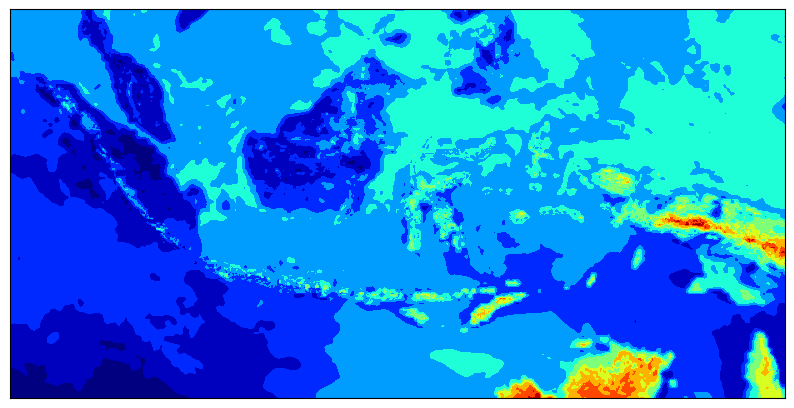

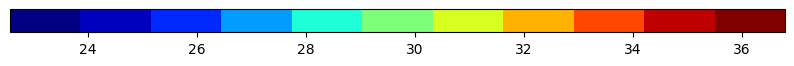

In [6]:
tc = nch.ds["tc"]
nch.nc2image(tc[0][0], f"{dir_path}/tc", x_dim="lon", y_dim="lat", flip=0, cmap="tc_color.txt")

In [7]:
nch.geotiff2tiles("C:/Users/falbas/miniconda3/Scripts/gdal2tiles.py", f"{dir_path}/tc_rgb.tiff", f"{dir_path}/tiles/tc", "5-7", 16)